In [85]:
import cv2
import numpy as np
import os

def getPeaks(i):
  img = cv2.imread(root+'Data_preprocess/'+i, cv2.IMREAD_COLOR)[7:-7,7:-7]
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret,threshed = cv2.threshold(gray,170,255,cv2.THRESH_BINARY)

  cnts = cv2.findContours(threshed,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)[-2]

  cnt = sorted(cnts, key=cv2.contourArea)[-1]
  arclen = cv2.arcLength(cnt, True)

  eps = 0.005
  epsilon = arclen * eps
  approx = cv2.approxPolyDP(cnt, epsilon, True)

  canvas = img.copy()
  for pt in approx:
    if (pt[0][0]!=0 and pt[0][1]!=0) or (pt[0][0]!=0 and pt[0][1]!=216):
      cv2.circle(canvas, (pt[0][0], pt[0][1]), 1, (255,0, 0), 3)

  plt.axis('off')
  plt.imshow(canvas)
  plt.savefig(root+'curves/withPeaks/result'+i, bbox_inches='tight')
  
  plt.show()
  return approx

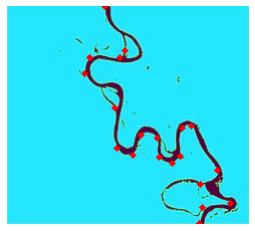

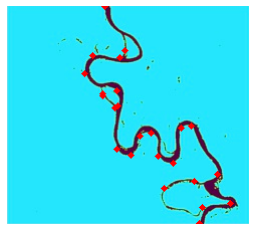

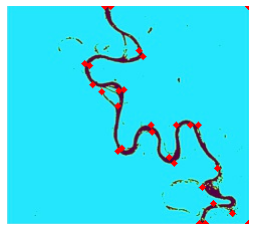

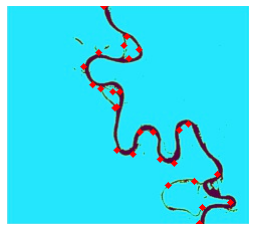

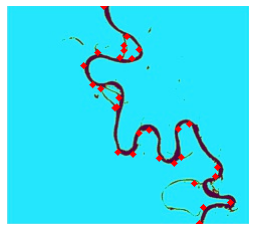

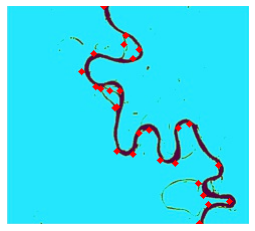

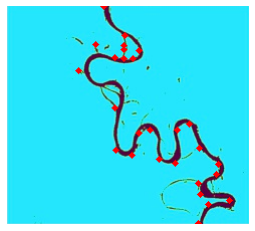

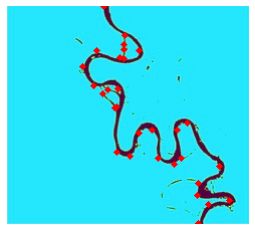

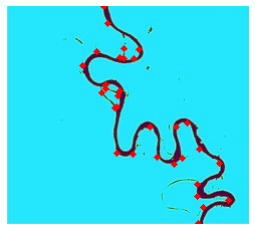

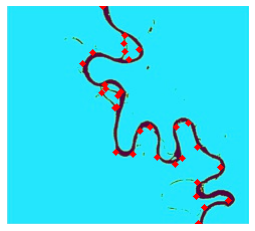

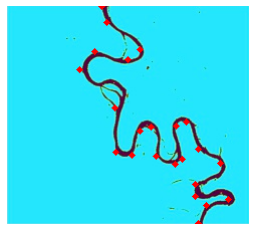

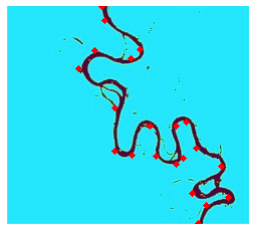

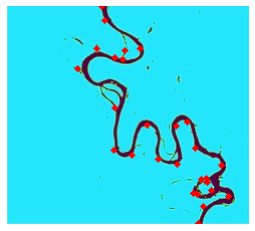

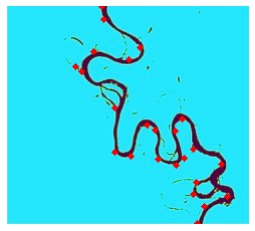

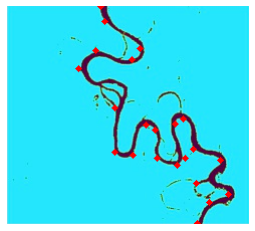

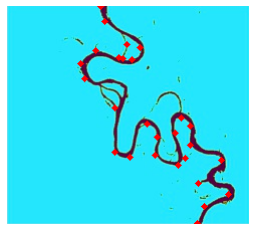

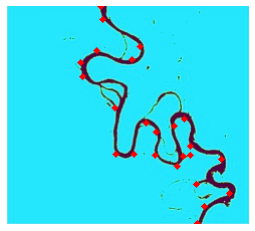

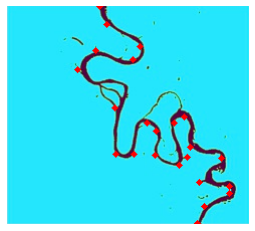

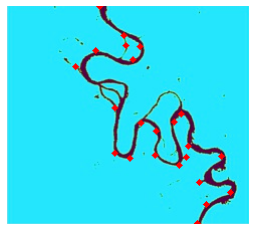

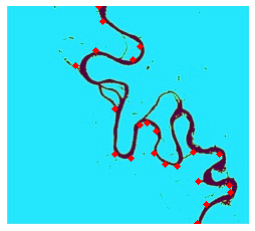

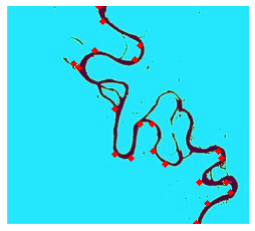

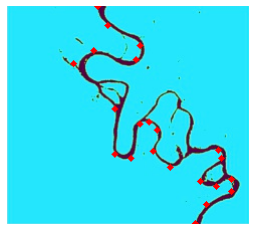

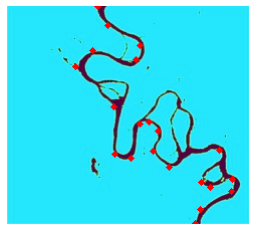

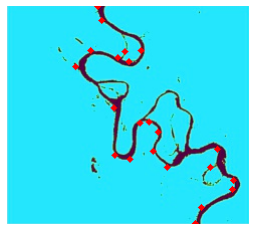

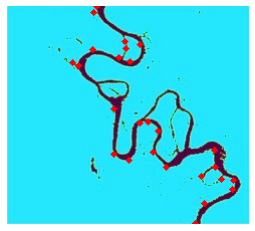

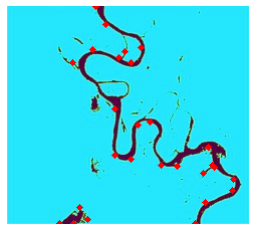

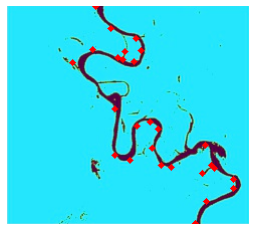

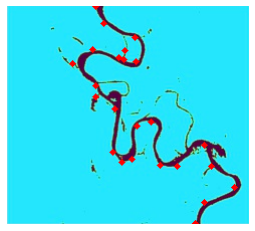

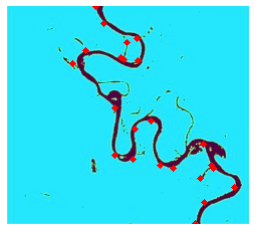

In [86]:
peaks=[]
for i in os.listdir(root+'Data/'):
  peak=getPeaks(i)
  peaks.append(peak)

In [116]:
avgs=[]
for peaks_i in peaks:
  xs=[i[0][0] for i in peaks_i]
  xs=xs[2:]
  ys=[i[0][1] for i in peaks_i]
  ys[2:]
  (a,b)=(sum(xs)/len(xs), sum(ys)/len(ys))
  avgs.append((a,b))

In [118]:
import math

dists=[]
for i in range(len(avgs)-1):
  d=math.sqrt((avgs[i+1][0]-avgs[i][0])**2+(avgs[i+1][1]-avgs[i+1][0])**2)
  dists.append(d)

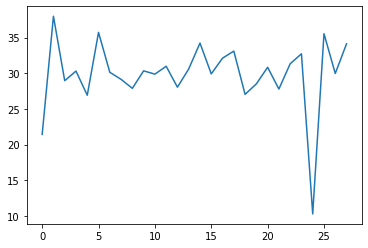

In [119]:
import seaborn as sns

plt.plot(dists)